# Statistics for Data Science with Python Project

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from math import sqrt
import statsmodels.api as sm

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df  = pd.read_csv(boston_url)
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


For the "Median value of owner-occupied homes" provide a boxplot

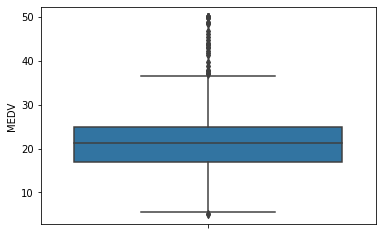

In [3]:
ax = sns.boxplot(y="MEDV", data=boston_df)

Provide a histogram for the Charles river variable

(array([471.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  35.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

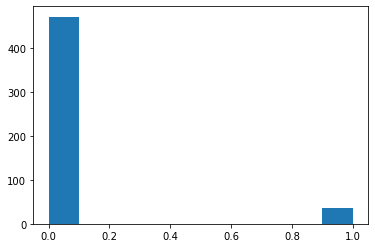

In [4]:
plt.hist(boston_df['CHAS'])

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

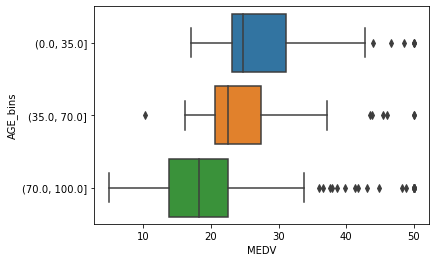

In [5]:
df_ages = pd.DataFrame({'MEDV': boston_df['MEDV']})
df_ages['AGE_bins'] = pd.cut(x=boston_df['AGE'], bins=[0, 35, 70, max(boston_df['AGE'])])
ax = sns.boxplot(x="MEDV", y='AGE_bins', data=df_ages)

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

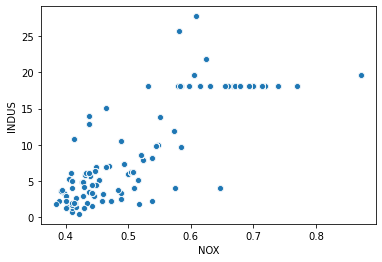

In [6]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)

Create a histogram for the pupil to teacher ratio variable

(array([ 15.,   2.,  58.,  15.,  35.,  69.,  76.,  40., 178.,  18.]),
 array([12.6 , 13.54, 14.48, 15.42, 16.36, 17.3 , 18.24, 19.18, 20.12,
        21.06, 22.  ]),
 <a list of 10 Patch objects>)

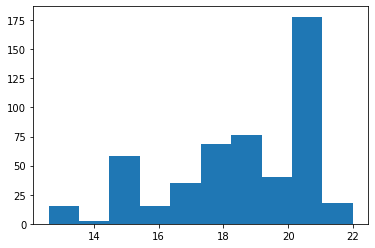

In [7]:
plt.hist(boston_df['PTRATIO'])

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [8]:
tt_statistic, p_value = scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                                             boston_df[boston_df['CHAS'] == 1]['MEDV'],
                                             equal_var = True)
print("T-Test_Statistic: {0}, P-Value: {1}".format(tt_statistic,p_value))

T-Test_Statistic: -3.996437466090509, P-Value: 7.390623170519905e-05


Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [9]:
age_group_1 = boston_df[boston_df['AGE'] <= 35]['MEDV']
age_group_2 = boston_df[(boston_df['AGE'] > 35) & (boston_df['AGE']<= 70)]['MEDV']
age_group_3 = boston_df[boston_df['AGE'] > 70]['MEDV']
f_statistic, p_value = scipy.stats.f_oneway(age_group_1,age_group_2,age_group_3)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [10]:
p_statistic,p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print("Pearson Correlation: {0}, P-Value: {1}".format(p_statistic,p_value))

Pearson Correlation: 0.763651446920915, P-Value: 7.913361061239593e-98


What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [11]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           1.21e-08
Time:                        20:46:14   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""